# Personal Loan Campaign Modelling

## Problem:

**The data-set aims to answer the following key questions:**

- What are the different factors that influence whether a customer accepted the personal loans
- How are accurate are our predictions using the model we created?

------------------------------

## Attribute Information:

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Importing Necessary Libraries such as pandas, numpy, matplotlib.pyplot, seaborn

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import GridSearchCV

## Reading the data from a .csv file

In [2]:
#read csv into a dataframe called 'data'
data = pd.read_csv('C:/Users/zeezu/Desktop/Python Coding/csv/Loan_Modelling.csv')

In [3]:
#copying the data frame into a new data frame to retain original data.
df = pd.DataFrame(data)

## Checking 10 random rows

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 8 random rows
# I'm setting the random seed via np.random.seed so that I get the same random results every time
np.random.seed(1)
df.sample(10)

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


### Observations

* The data has 14 columns, all of which seem to be numerical.
* The `Education` column is limited to 3 levels, 1 being undergrad, 2 being Graduate and 3 being Advanced/Professional.
* Some of the columns provide information based on yes/no questions such as `Personal_Loan`, `Securities_Account` etc. These columns are filled with 0's and 1's, representing those yes's and no's.
* The `ID` and `ZIPCode` columns are not going to be used in this dataset so we shall drop them later on.

### Note

* We can convert the yes/no columns to categorical types to save space in storing the dataframes but for this project we shall leave them as is.
* `Education` and `Family` can also be converted to a categorical variables since they have ranges bounding them.

## Checking the info of the dataset

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observations

* This confirms our assumptions that all columns are numerical seeing as there are only two datatypes represented in the dataset which are int64 and float64.
* It also seems like there are no apparent missing values.
* `Personal_Loan` is our independent variable.


## Checking a description of the data

In [6]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations

* The average age for customers in our dataset is 45 years old and we don't have anyone below 23 years of age.
* The average number of work experience is about 20 years, while the average annual income for customers is 73,000 dollars.
* It seems there are some negative values in Experience that might have been due to an error, we shall have to impute those values.

In [7]:
# Check for missing values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations

* This confirms that there are no missing values in the dataset.

## Exploratory Data Analysis

In [8]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Univariate Analysis

#### Exploring `Age`

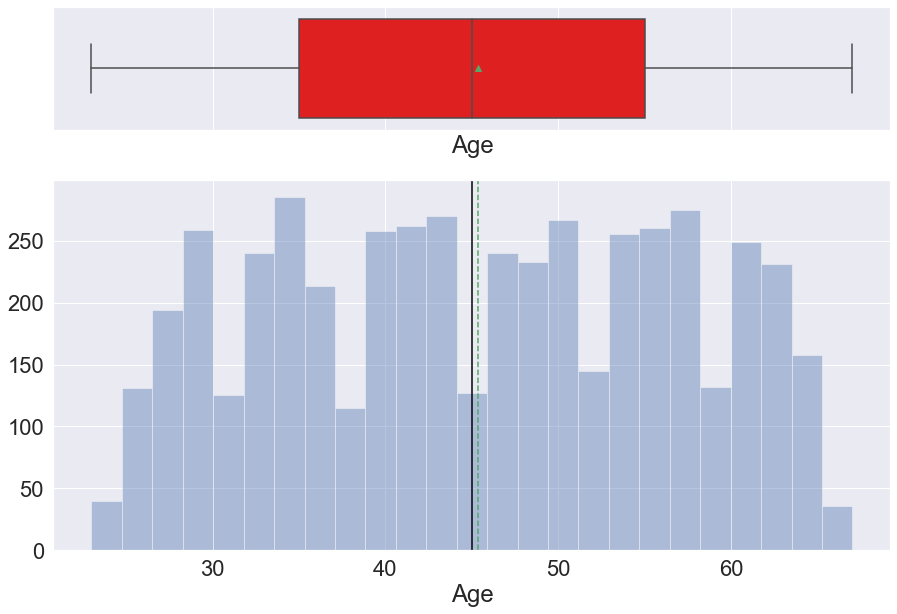

In [9]:
histogram_boxplot(df.Age, bins=25)

* We can see the variable follows a normal distribution.
* Average age is around 45.

#### Exploring `Income`

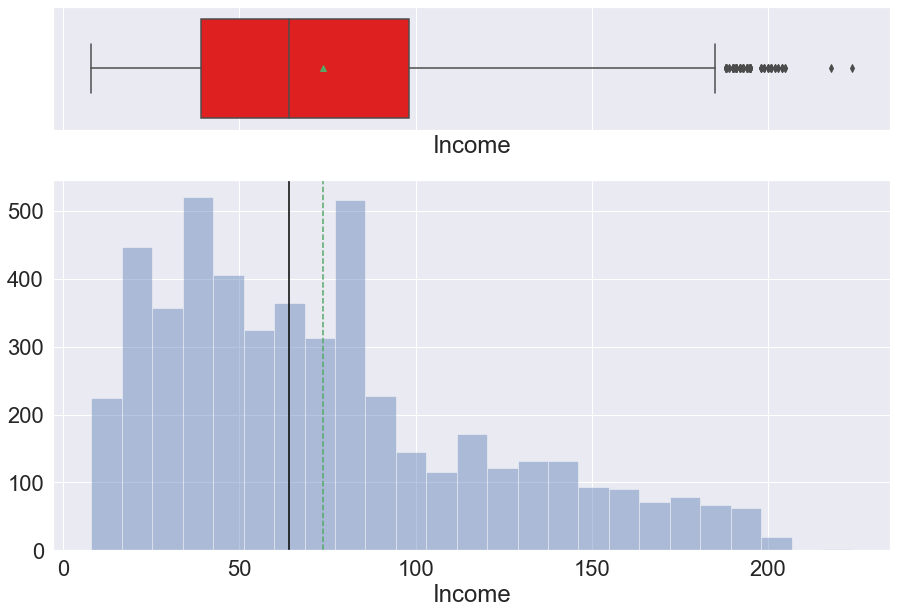

In [10]:
histogram_boxplot(df.Income, bins=25)

* Income is slightly right skewed with a couple of outliers by the right indicating there are some customers tht earn over 200,000 dollars per annum in income.
* The average income is around 75,000 dollars.

#### Exploring `Mortgage`

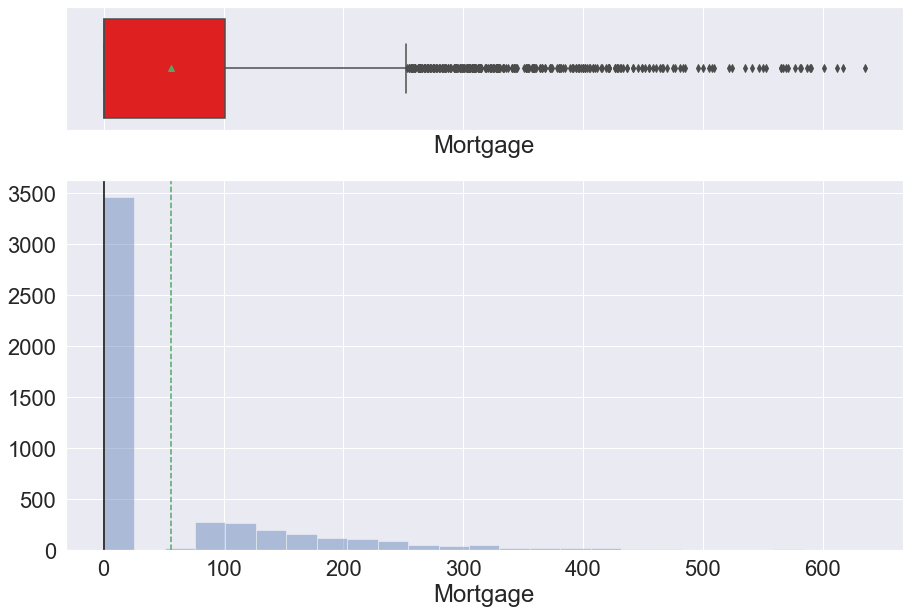

In [11]:
histogram_boxplot(df.Mortgage, bins=25)

* This is highly right skewed, where we see most customers do not have a mortgage.
* We have quite a number of outliers, indicating some customers have 250,000 dollars in mortgage fees.

#### Exploring `CCAvg`

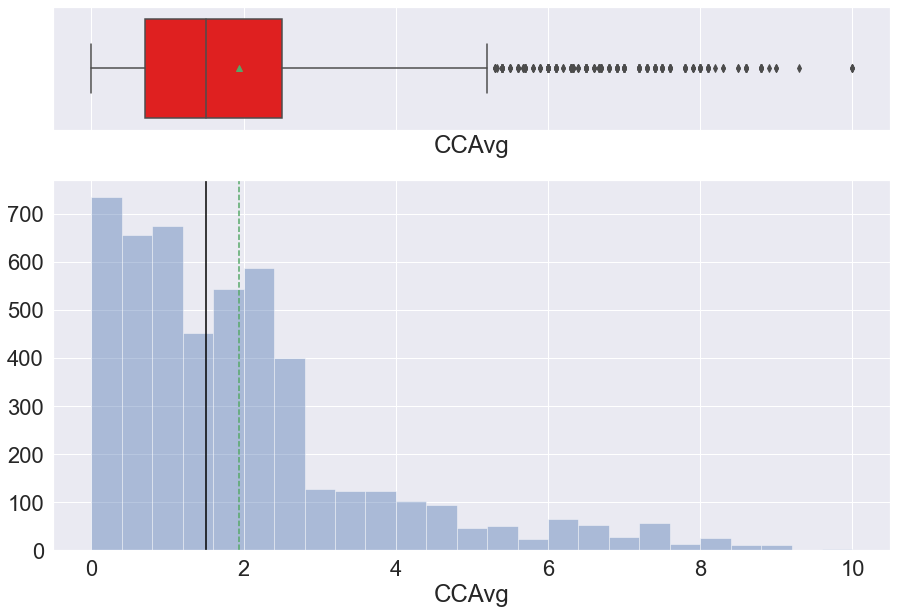

In [12]:
histogram_boxplot(df.CCAvg, bins=25)

* This is also right skewed, with a few outliers to the right indicating some people spend over 5,000 dollars monthly on their credit cards.

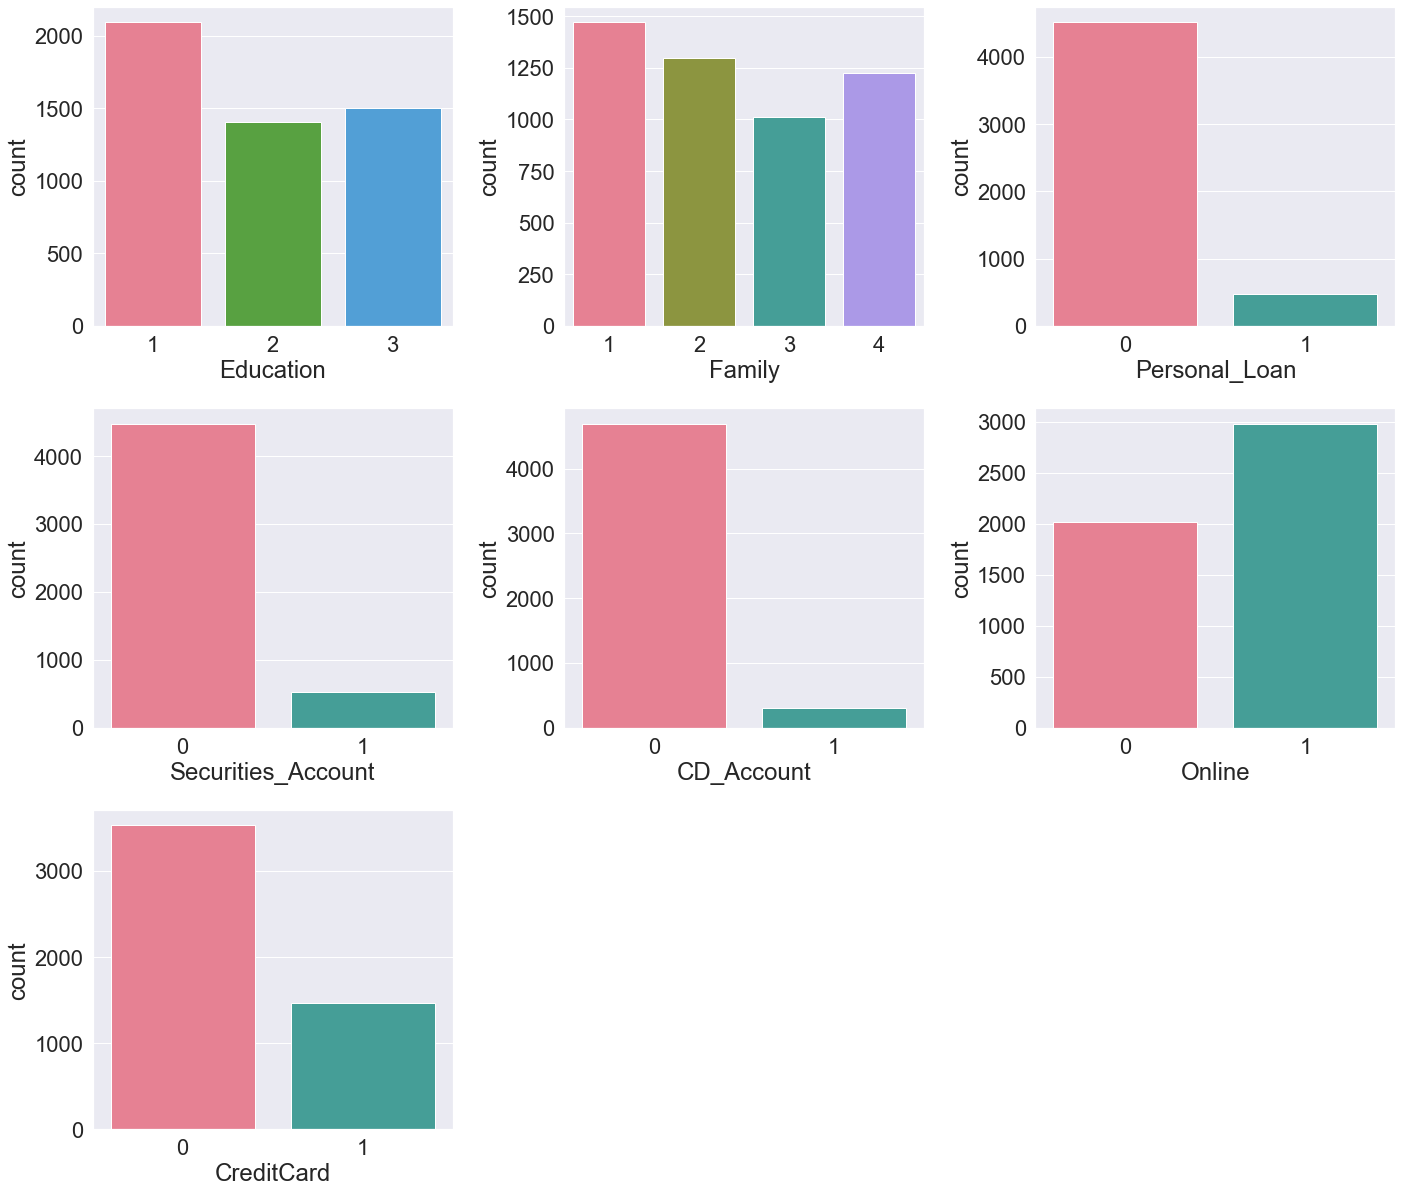

In [13]:
#Let's explore the yes/no columns and the 'family' and 'Education' columns

cat_col = ['Education','Family','Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'] 

plt.figure(figsize=(20,100))

for i in range(len(cat_col)):
    plt.subplot(18,3,i+1)
    sns.countplot(df[cat_col[i]],palette='husl')
    plt.tight_layout()

plt.show()

* Most customers in our dataset are undergrads with graduates and professionals having relatively the same number of people.
* We have a high number of single people in our dataset, followed by people with families of 2 and 4, families of 3 are the least in our dataset.
* Most people did not take the personal loans offered.
* Most people do not have securities account with the bank or a certificate of deposit account with the bank.
* Most people use the internet banking facilities.
* Most people do not use credit cards issued by other banks.

## Multivariate Analysis

### Exploring `Personal_Loan` against `Mortgage`

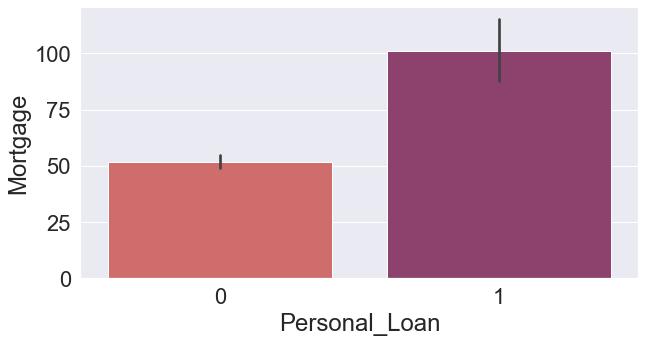

In [14]:
#Plotting a bar plot with smoker on the x-axis and charges on the y-axis
plt.figure(figsize=(10,5))
sns.barplot(x="Personal_Loan", y="Mortgage", data=df, palette='flare');

* This shows that customers who have mortgages tend to accept loans more.

### Exploring `Personal_Loan` against `Online`

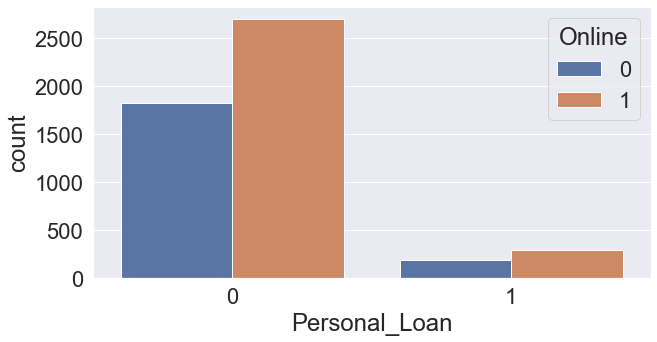

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x="Personal_Loan",hue="Online", data=df);

* There are more people who do not accept loans that use internet banking than those who do not use internet banking.

### Exploring `Personal_Loan` against `Education`

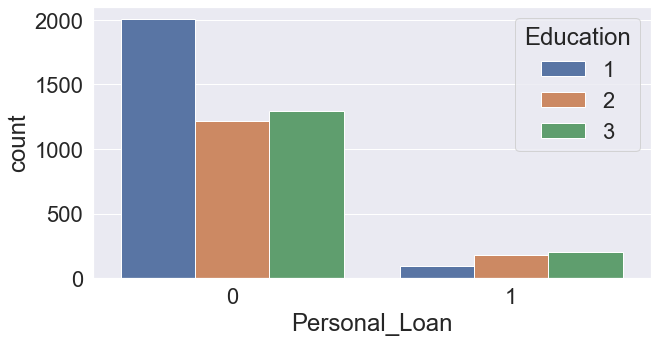

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x="Personal_Loan",hue="Education", data=df);

* This shows that the customers who are undergrads tend to be the most not accepting loans, while customers who are graduates and professionals accept loans more.

### Exploring `Personal_Loan` against `CCAvg`

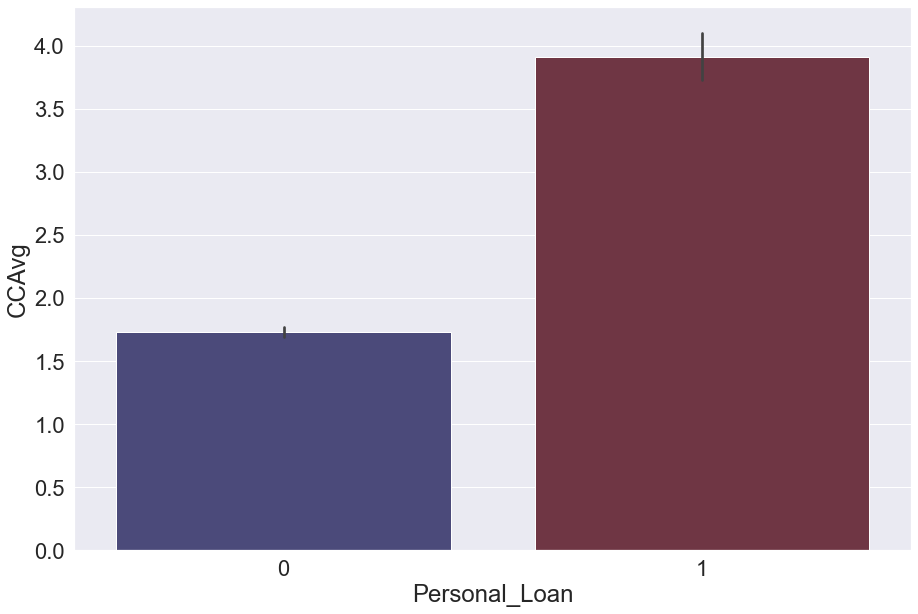

In [17]:
#Bar plot with Product on the x-axis and Income on the y-axis
plt.figure(figsize=(15,10))
sns.barplot(x='Personal_Loan', y='CCAvg', data=df, palette='icefire');

* This shows that people with high credit card usage per month tend to take loans more than people with lower credit card usage.

## Lets look at outliers in every numerical column

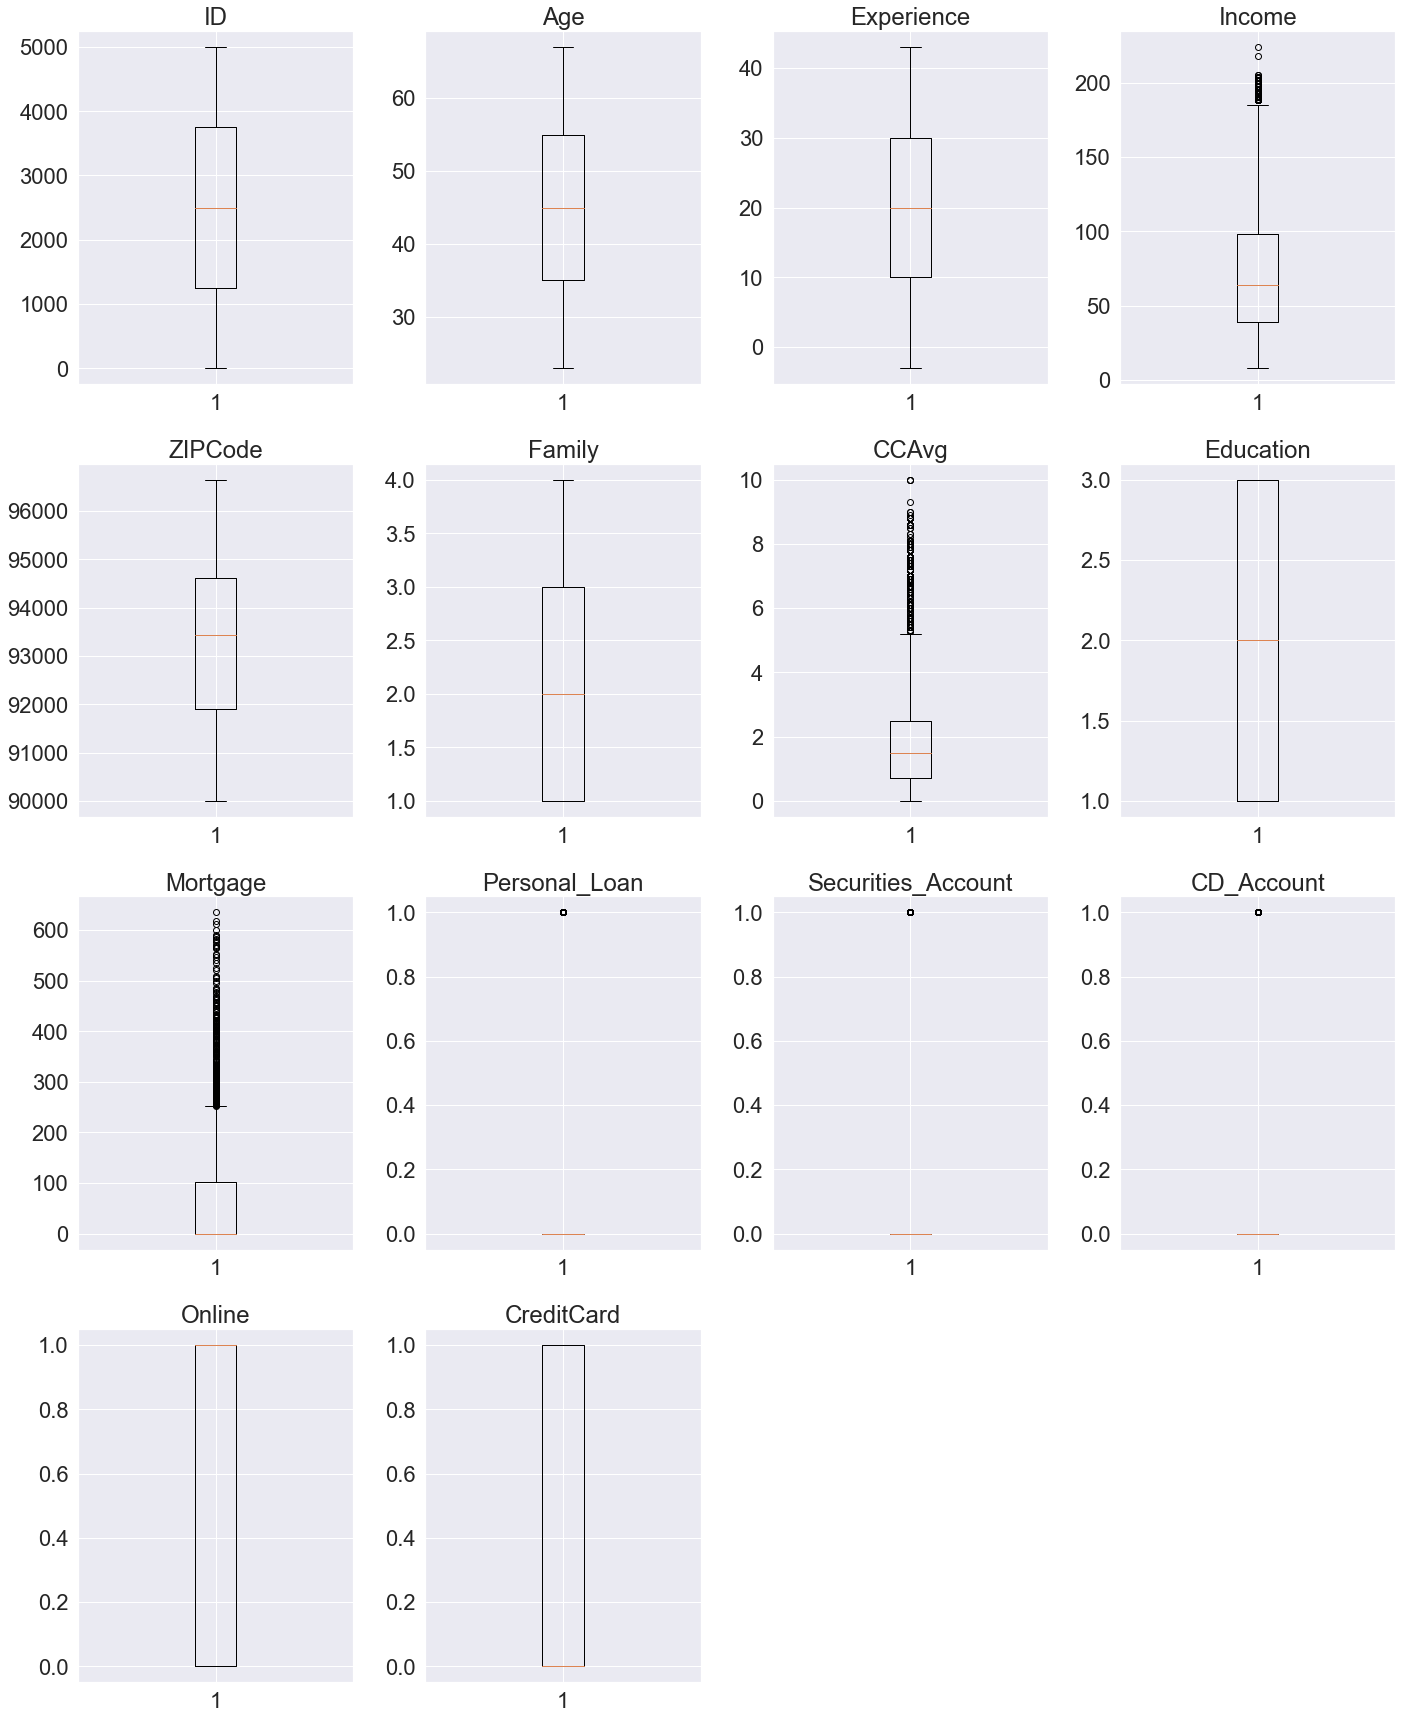

In [18]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Mortgage, Income and CCAvg have upper outliers.
* Securities_Account and CD_Account have very little upper outliers also.
* We shall treat the first 3 columns as they have numerous outliers and leave the others seeing as they do not have as many observations and can prove useful to the model.

## Treating Outliers

In [19]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [20]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()# getting list of all columns

  
# items to be removed 
unwanted= {'Personal_Loan', 'CD_Account', 'Securities_Account'}
  
numerical_col = [ele for ele in numerical_col if ele not in unwanted] 
df = treat_outliers_all(df,numerical_col) #returns a dataframe with outliers removed

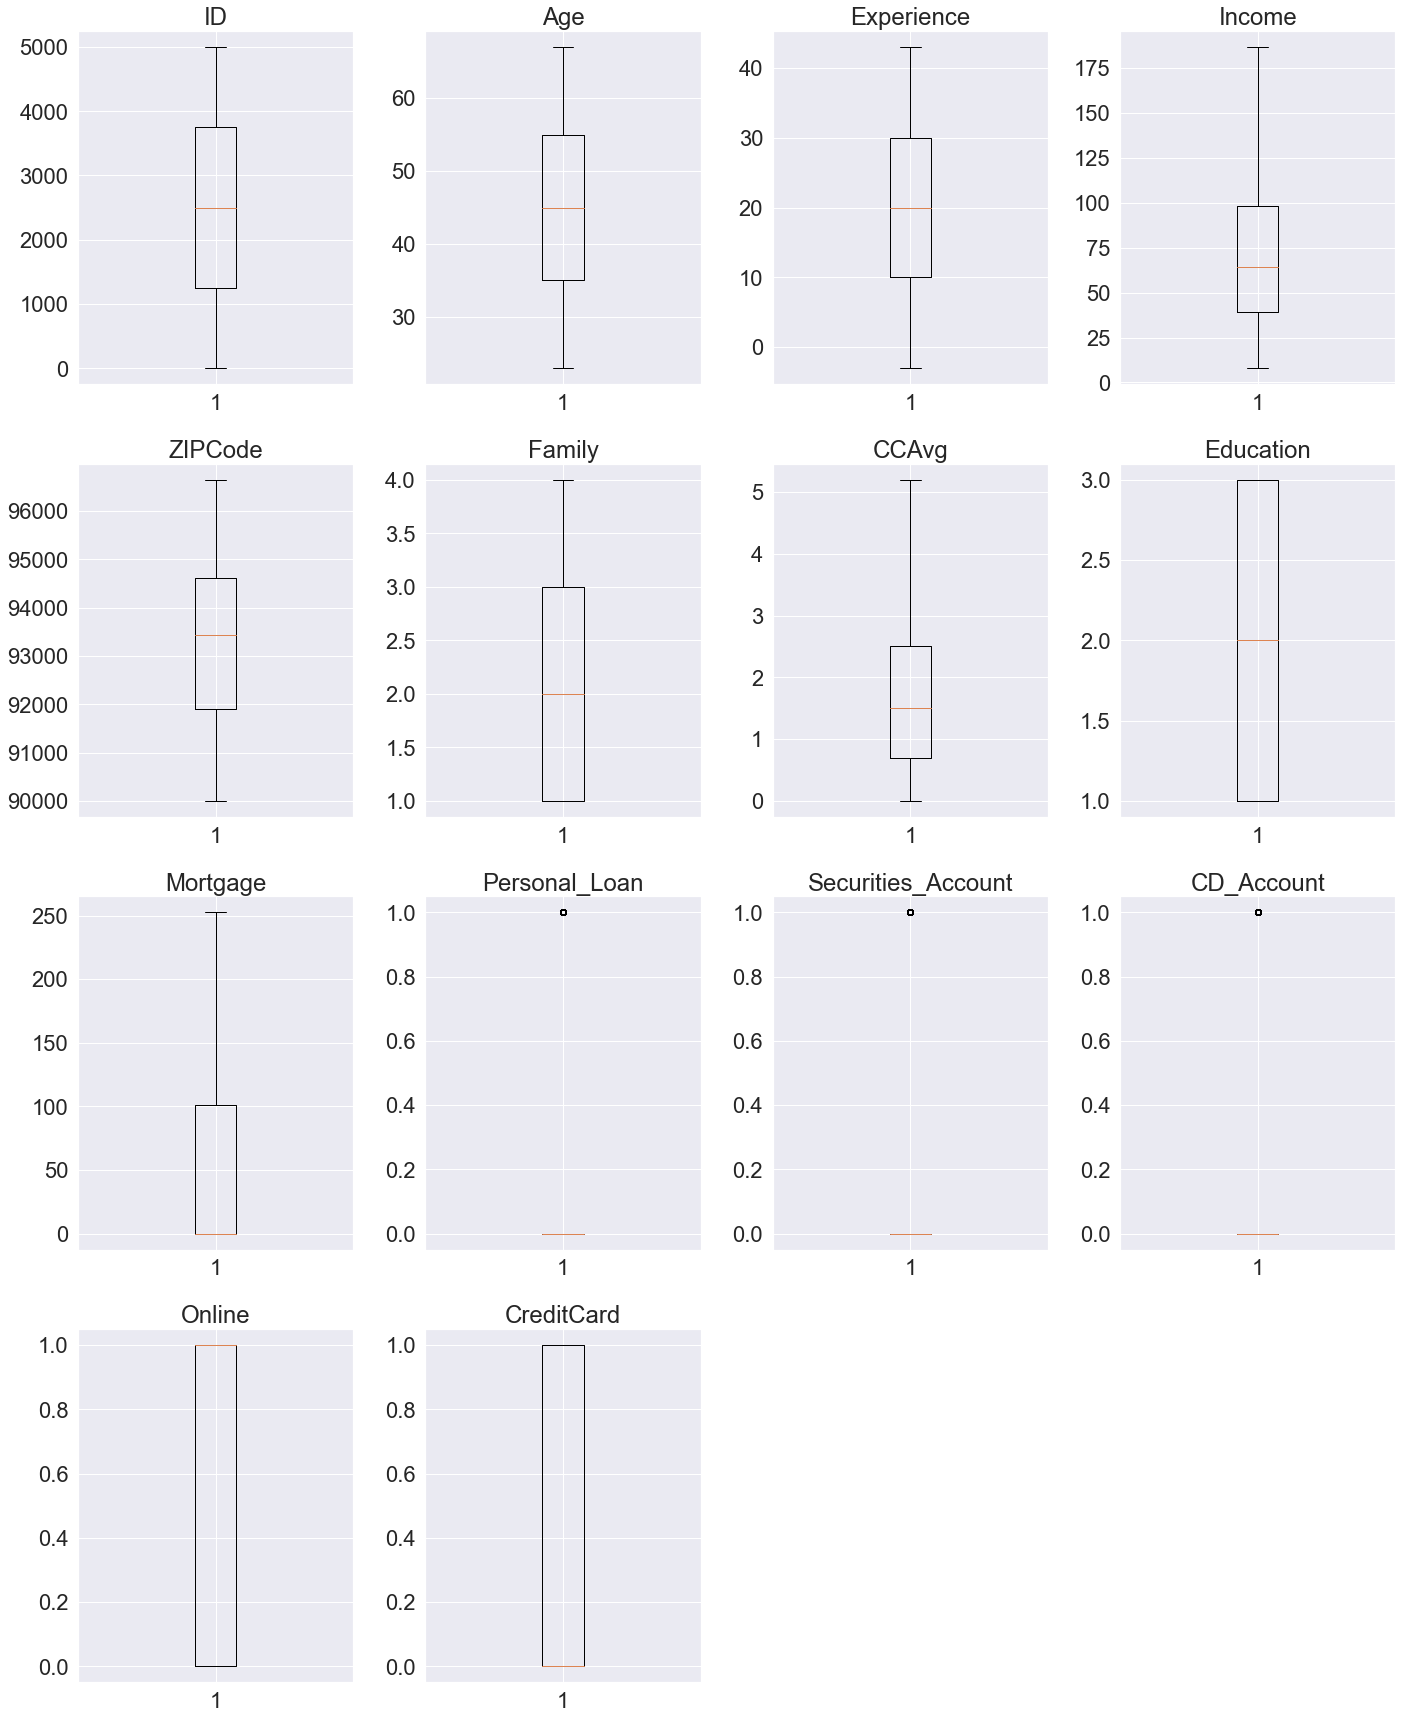

In [21]:
#Checking to see if outliers are still present

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Correlation Plot

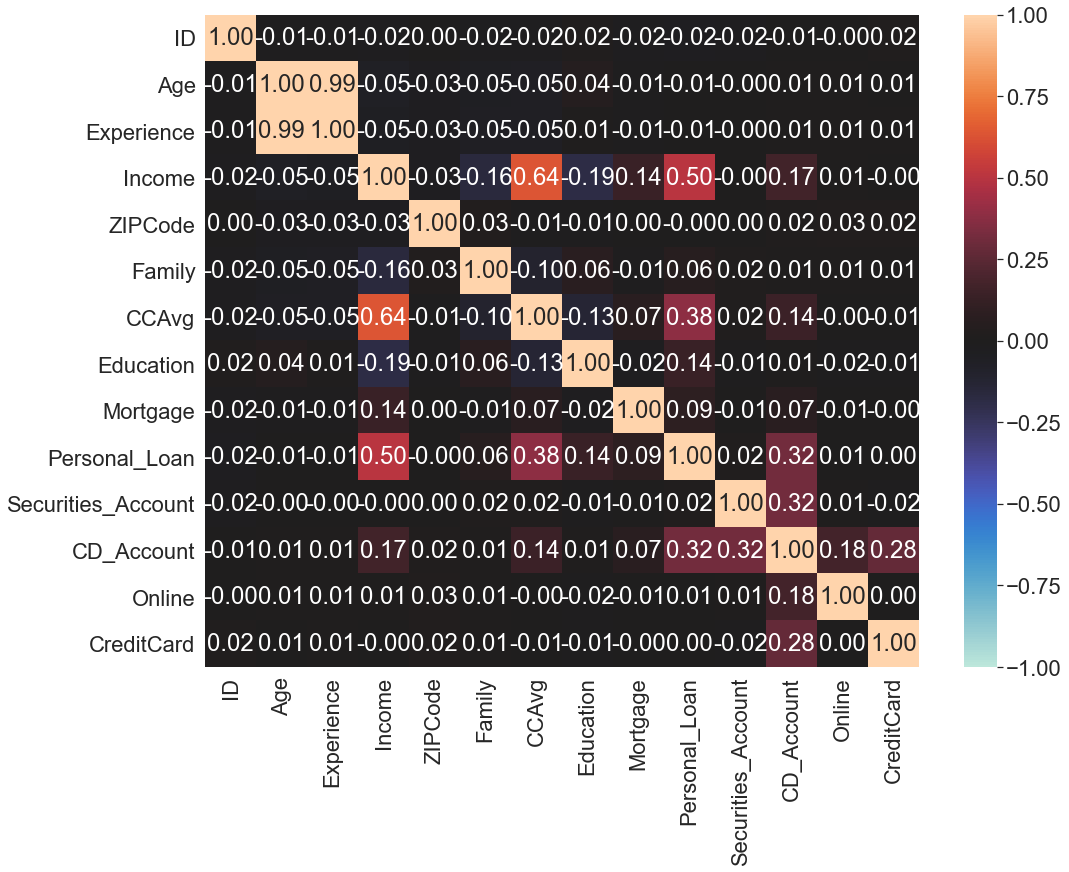

In [22]:
corr = df[numerical_col].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='icefire',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

* Looking at the correlation plot, we notice that the Age and Experience columns are highly correlated which means one of the variables can explain the other and we will have to drop one of them.

# Data Preparation

### Treating negative values in the `Experience` column

In [23]:
#Let's take a look at the number of rows that have experience below 0
df.where(df['Experience']<0)['Experience'].count()

52

In [24]:
#We can change these values to nan's, then impute them using the median of the Experience column

#Getting the unique lnegative values
df.where(df['Experience']<0)['Experience'].unique()

array([nan, -1., -2., -3.])

In [25]:
#Changing the unique values to nan's
df['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
df['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
df['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [26]:
#Checking number of null values under Experience
df['Experience'].isnull().sum()

52

In [27]:
#filling null values under Experience with its median
df['Experience'].fillna(df['Experience'].median(),inplace=True)

In [28]:
#Checking the dataset for null values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [29]:
df.shape

(5000, 14)

* There are no missing values and the negative values have been imputed, also the shape still remains the same.

### Dropping the `ID`, `Experience` and `ZIPCode` Columns

In [30]:
#Dropping unwanted columns
df.drop(['ID','Experience','ZIPCode'],axis=1,inplace=True)

In [31]:
#Checking if the columns have been dropped
df.head(3)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,11.0,1,1.0,1,0.0,0,0,0,0,0


### Splitting the data

In [32]:
#Retaining original dataframe in case of need
df1 = pd.DataFrame(df)

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal_Loan',axis=1) #Dependent variables
Y = df['Personal_Loan']   # Predicted Loan (1=True, 0=False) (Independent variable)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,47,35.0,2,1.3,1,0.0,0,0,1,0
4768,38,39.0,1,2.0,2,0.0,0,0,1,0
65,59,131.0,1,3.8,1,0.0,0,0,1,1
177,29,65.0,4,1.8,2,244.0,0,0,0,0
4489,39,21.0,3,0.2,2,0.0,0,0,1,0


Lets check split of data

In [34]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Splitting the data

# Logistic Regression

In [35]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)
model.fit(x_train, y_train)

def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#predict on test
pred_test = model.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


In [36]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9506666666666667


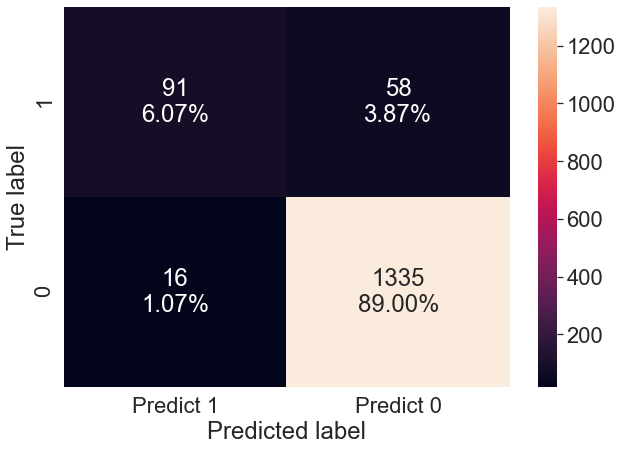

In [37]:
#Confusion matrix for test set
make_confusion_matrix(y_test,pred_test)

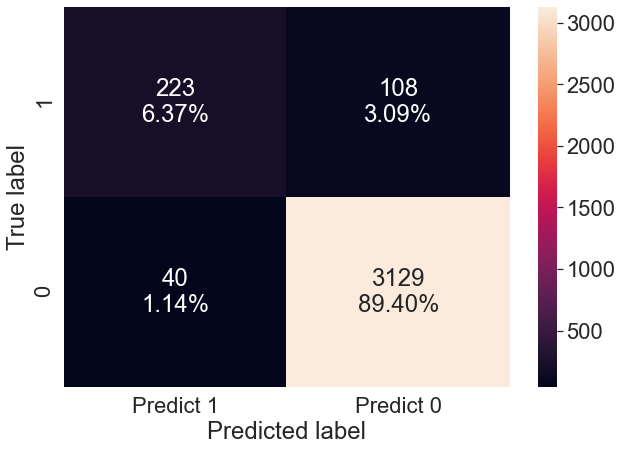

In [38]:
#Predict for train set
pred_train = model.predict(x_train)


#Confusion matrix for train set
make_confusion_matrix(y_train,pred_train)

In [39]:
#Accuracy with a threhold of 0.5

print('Accuracy on train data:',accuracy_score(y_train, pred_train))
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.9577142857142857
Accuracy on test data: 0.9506666666666667


* Accuracy might not be the best metric for this particular scenario. We would like to minimize our False Positives seeing as predicting a customer would actually take a loan whereas in actuality they did not would be bad for the bank. Therefroe we shall be using Precision as our metric for this model. 

### AUC ROC Curve

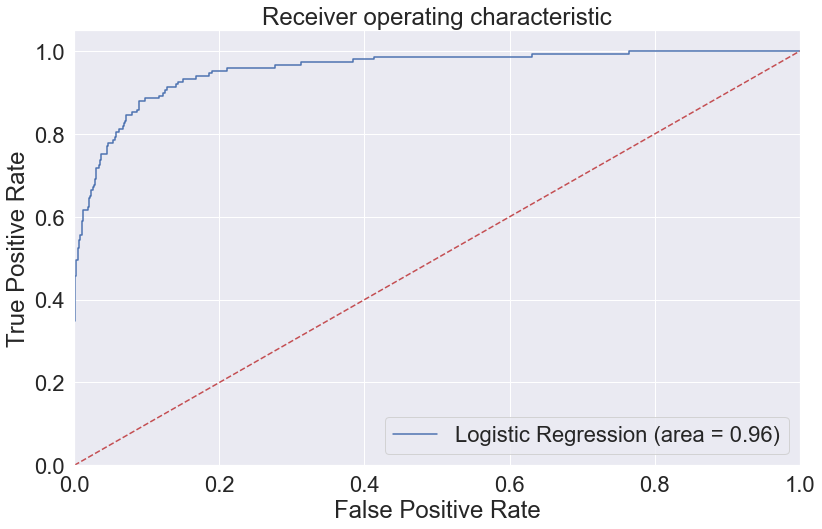

In [40]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

* The high ROC indicates our model does a good job at distinguishing classes.

In [41]:
#Precision with a threshold of 0.5

print('Precision on train data:',precision_score(y_train, pred_train))
print('Precision on test data:',precision_score(y_test, pred_test))

Precision on train data: 0.8479087452471483
Precision on test data: 0.8504672897196262


In [42]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.61      0.71       149

    accuracy                           0.95      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [43]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3169
           1       0.85      0.67      0.75       331

    accuracy                           0.96      3500
   macro avg       0.91      0.83      0.86      3500
weighted avg       0.96      0.96      0.96      3500



* This model gives us a precision of 85% on both the test and train sets, implying that we can predict 85% of the time whether a customer is going to accept a loan or not. The model is quite good and can be used to make further statistical decisions.

## Check for multicollinearity

### Let us ensure that Multicollinearity doesn't exist

In [44]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [45]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 35.365119
Age                    1.008401
Income                 1.797024
Family                 1.032190
CCAvg                  1.693890
Education              1.043639
Mortgage               1.022981
Securities_Account     1.136701
CD_Account             1.328100
Online                 1.039513
CreditCard             1.107615
dtype: float64



* There's no multicollinearity in our data.

## Build the logistic regression model 

**Split into training and test set**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30)

**Building Logistic Regression model from statsmodels**

In [47]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit();

Optimization terminated successfully.
         Current function value: 0.116982
         Iterations 9


**Let us look at summary**

In [48]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.6142
Time:                        14:29:03   Log-Likelihood:                -409.44
converged:                       True   LL-Null:                       -1061.2
Covariance Type:            nonrobust   LLR p-value:                6.676e-274
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.2823      0.903    -16.925      0.000     -17.052     -13.513
Age                    0.0205      0.008      2.522      0.012       0.005       0.036
Income              

## Intepretation of Coefficients

* The most influential features seem to be `CD_Account`, `Education`, `Family` and `CCAvg`
* Factors that affect the model negatively are `Securities_Account`,`Online` and `CreditCard`
* We shall drop some of these columns to try and find the most optimal model.

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [49]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [50]:
# Filter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD_Account,3.88,48.19,0.98,0.00
Education,1.75,5.77,0.85,0.00
Family,0.74,2.10,0.68,0.00
CCAvg,0.33,1.39,0.58,0.00
Income,0.06,1.06,0.51,0.00
Online,-0.79,0.46,0.31,0.00
CreditCard,-1.05,0.35,0.26,0.00
const,-15.28,0.00,0.00,0.00


* From looking at the odds ratio we can see that the probability that a customer who has a Certificate of deposit account will loan is 98%
* We can look at the other variables and see their importance

## Dropping columns that affect model negatively to try and improve Precision

In [51]:
X_withoutCrC = X.drop(['CreditCard'],axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_withoutCrC, Y, test_size=0.30)

In [53]:
logit = sm.Logit(y_train, X_train)
lg2 = logit.fit();

Optimization terminated successfully.
         Current function value: 0.225034
         Iterations 8


In [54]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.2898
Time:                        14:29:03   Log-Likelihood:                -787.62
converged:                       True   LL-Null:                       -1109.0
Covariance Type:            nonrobust   LLR p-value:                1.558e-133
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.1027      0.005    -19.000      0.000      -0.113      -0.092
Income                 0.0236      0.002     13.796      0.000       0.020       0.027
Family              

In [55]:
model2 = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)
model2.fit(X_train, y_train)


pred_test = model2.predict(X_test)
pred_train = model2.predict(X_train)

#Precision with a threshold of 0.5

print('Precision on train data:',precision_score(y_train, pred_train))
print('Precision on test data:',precision_score(y_test, pred_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Precision on train data: 0.8432835820895522
Precision on test data: 0.7565217391304347


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


#### Observations

* As we can see here, the `CreditCard` column has been dropped, although our precision dropped on the test set, it still remains relatively the same on the training set, therefore there is no main reason to drop `CreditCard` from our model.

* We shall be using our original model 'model' to carry out our predictions with a precision of 85%

## Recommendations

* Our final model predicts which customers will accept a loan or not accurately about 85% of the time, which is a very good model.
* Seeing as certificate of deposit is the most influential factor, advicing customers to open these types of accounts to prove very beneficial to the bank.
* Also, targeting loans towards people with mortgages can also be a good route to take seeing as people with mortgages tend to take loans more.
* More investigations shall have to be made to understand why undergrads are not accepting loans as customers with higher levels of education.
* It can also be beneficial targeting ads towards customer's that use internet banking to try and shift the tide and inncrease the number of people who use internet banking to also collect loans.